In [76]:
# Data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression

# For splitting data and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [77]:
data = pd.read_csv('solar_power_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,humidity,solar_irradiance,temperature,energy_production
0,2022-01-01,62.483571,519.584526,19.584632,45.939761
1,2022-01-02,59.653418,407.333812,16.585660,51.806938
2,2022-01-03,63.927819,551.165919,19.889962,65.616643
3,2022-01-04,68.648958,345.248763,18.223795,38.991621
4,2022-01-05,60.207166,623.584561,19.291879,60.911264


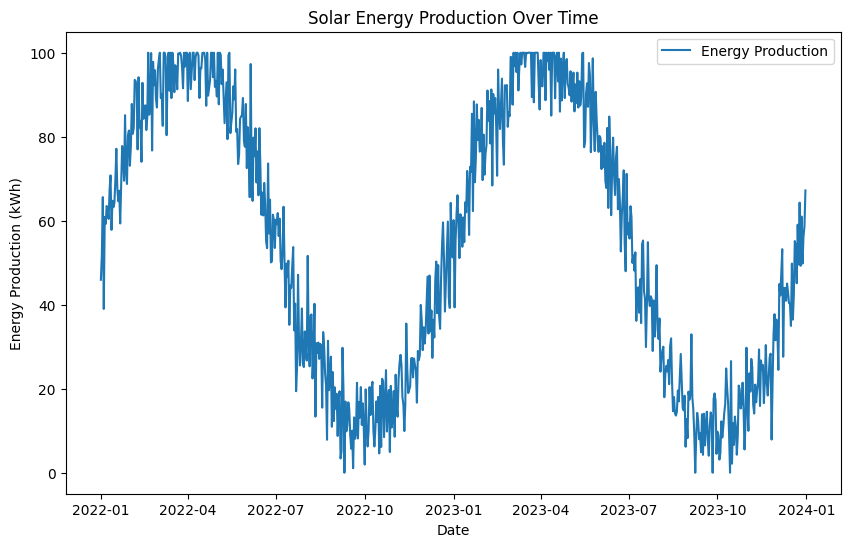

In [87]:
# Set the date column as the index
data.set_index('date', inplace=True)

# Plot the solar energy production over time
plt.figure(figsize=(10,6))
plt.plot(data.index, data['energy_production'], label='Energy Production')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.title('Solar Energy Production Over Time')
plt.legend()
plt.show()

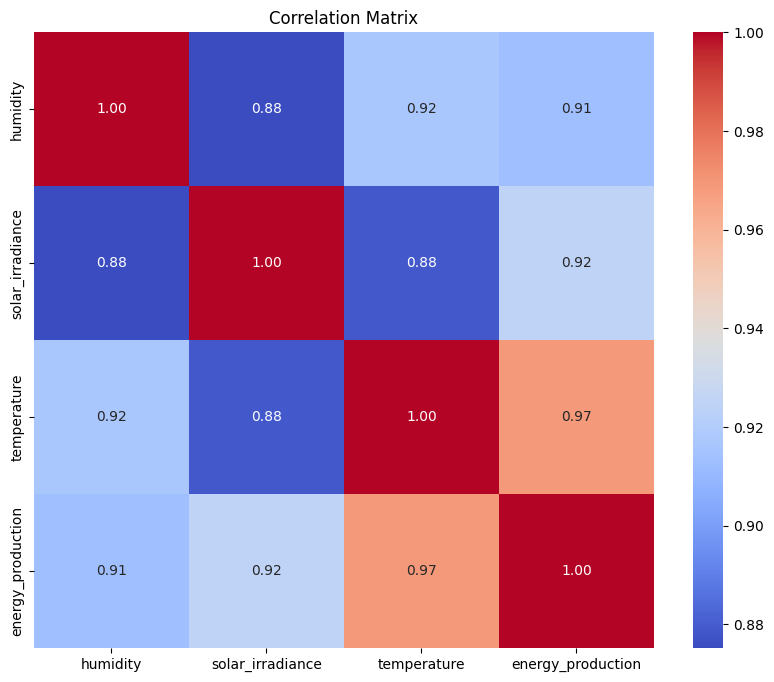

In [79]:
# Filter out non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

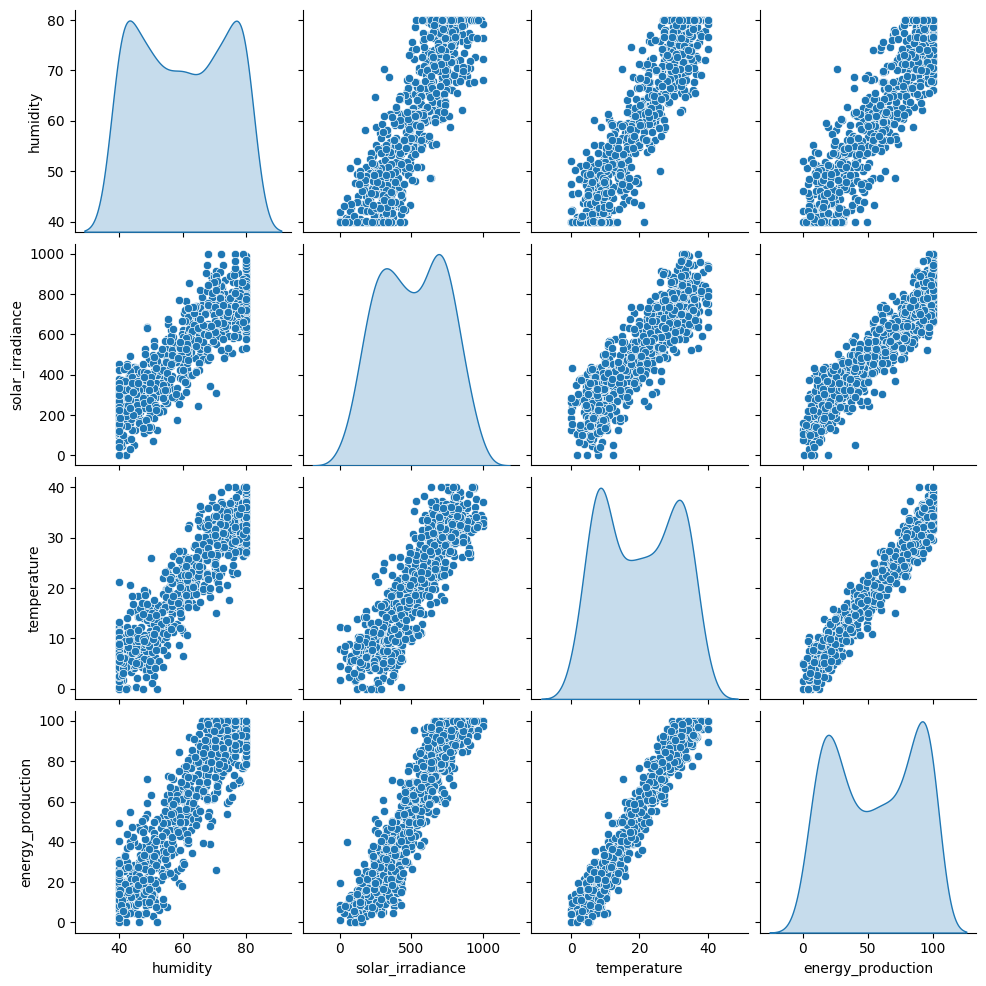

In [80]:

# Plot pairwise relationships between features and target variable
sns.pairplot(data, diag_kind='kde')
plt.show()

In [81]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Split target (y) and exogenous variables (X) for both train and test sets
y_train = train_data['energy_production']
X_train = train_data[['humidity', 'temperature', 'solar_irradiance']]

y_test = test_data['energy_production']
X_test = test_data[['humidity', 'temperature', 'solar_irradiance']]


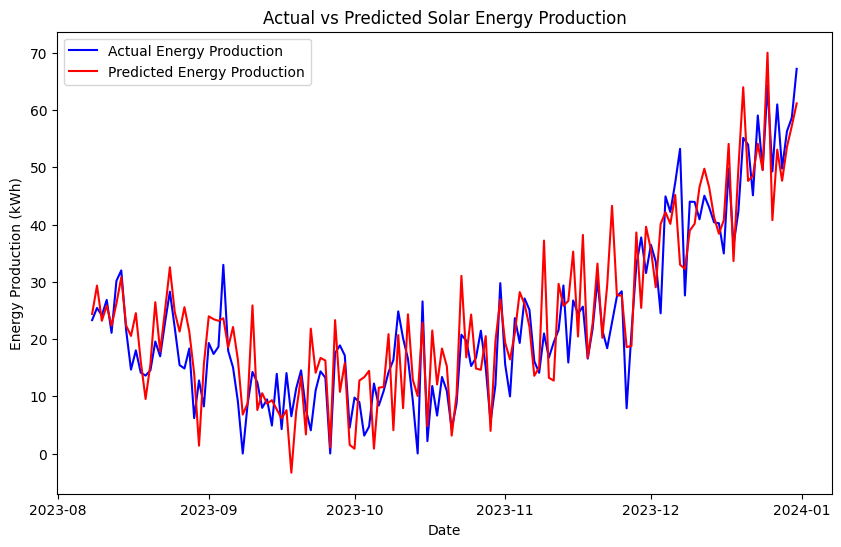

In [88]:
# Define and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
predicted_values = linear_model.predict(X_test)

# Plot actual vs predicted energy production with correct date formatting
plt.figure(figsize=(10,6))
plt.plot(test_data['date'], y_test, label='Actual Energy Production', color='blue')
plt.plot(test_data['date'], predicted_values, label='Predicted Energy Production', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.title('Actual vs Predicted Solar Energy Production')
plt.legend()
plt.show()



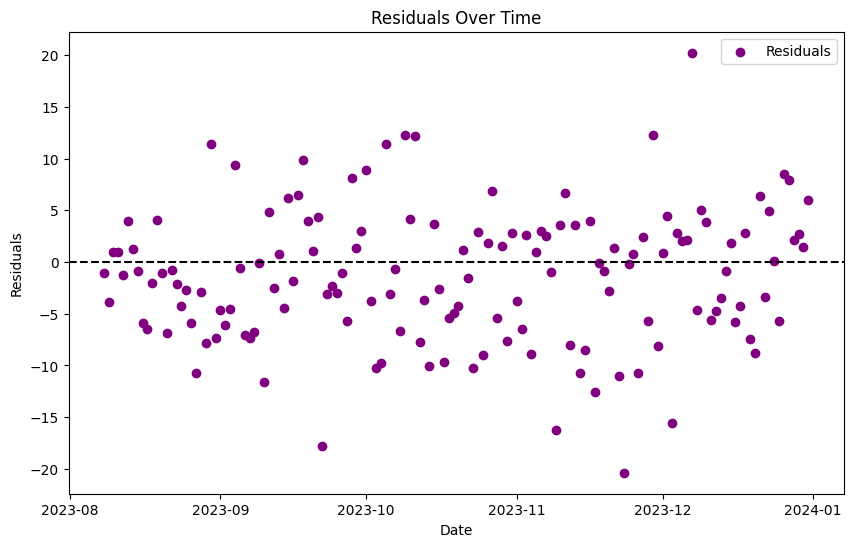

In [90]:
residuals = y_test - predicted_values
# Plot residuals as a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(test_data['date'], residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.show()


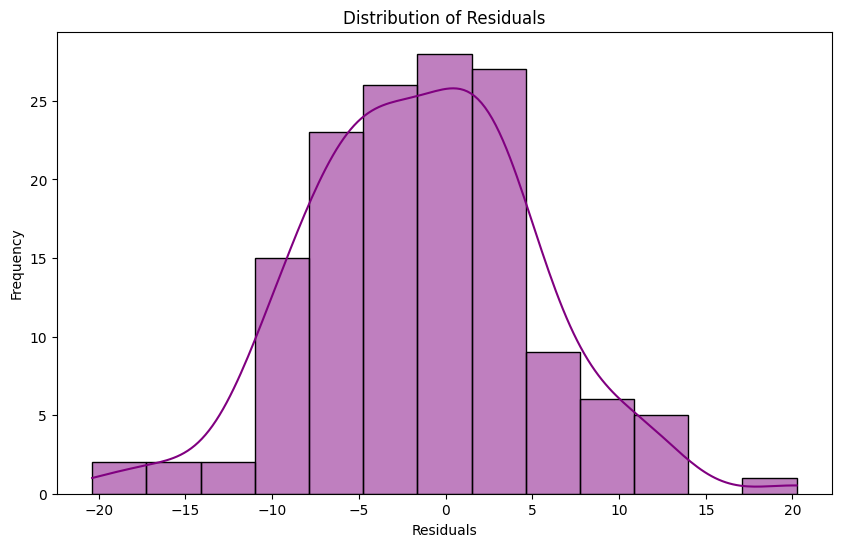

In [84]:
# Plot distribution of errors
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [85]:
# Calculate RMSE (Root Mean Squared Error)
rmse = math.sqrt(mean_squared_error(y_test, predicted_values))
print(f'RMSE: {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predicted_values)
print(f'MAE: {mae}')

# Calculate R² score
r2 = r2_score(y_test, predicted_values)
print(f'R² Score: {r2}')



RMSE: 6.638631085912071
MAE: 5.2686728818517885
R² Score: 0.8021951326317004


In [86]:
# Calculate accuracy in percentages
accuracy_percentage = r2 * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 80.22%
